Primero, instalamos las librerías que necesitamos para ejecutar el programa, y hacer las visualizaciones que me serviran para entender el problema.

In [14]:

from sklearn import linear_model
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

Una vez importadas todas las librerías que voy a necesitar, importo los datos de los CSV Train y Test.


In [15]:

df_train = pd.read_csv("hospitalizaciones_train.csv")
df_test = pd.read_csv('hospitalizaciones_test.csv')

Analizo los datos que tengo en train.

In [16]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 410000 entries, 0 to 409999
Data columns (total 15 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Available Extra Rooms in Hospital  410000 non-null  int64  
 1   Department                         410000 non-null  object 
 2   Ward_Facility_Code                 410000 non-null  object 
 3   doctor_name                        410000 non-null  object 
 4   staff_available                    410000 non-null  int64  
 5   patientid                          410000 non-null  int64  
 6   Age                                410000 non-null  object 
 7   gender                             410000 non-null  object 
 8   Type of Admission                  410000 non-null  object 
 9   Severity of Illness                410000 non-null  object 
 10  health_conditions                  410000 non-null  object 
 11  Visitors with Patient              4100

Verifico que no hayan datos nulos.

In [17]:
df_train.isna().sum().sort_values(ascending = False)
df_test.isna().sum().sort_values(ascending = False)

Available Extra Rooms in Hospital    0
Department                           0
Ward_Facility_Code                   0
doctor_name                          0
staff_available                      0
patientid                            0
Age                                  0
gender                               0
Type of Admission                    0
Severity of Illness                  0
health_conditions                    0
Visitors with Patient                0
Insurance                            0
Admission_Deposit                    0
dtype: int64

Verifico que no hayan datos duplicados.

In [18]:
df_train[df_train.duplicated()]

,Available Extra Rooms in Hospital,Department,Ward_Facility_Code,doctor_name,staff_available,patientid,Age,gender,Type of Admission,Severity of Illness,health_conditions,Visitors with Patient,Insurance,Admission_Deposit,Stay (in days)


In [19]:
df_test[df_test.duplicated()]

,Available Extra Rooms in Hospital,Department,Ward_Facility_Code,doctor_name,staff_available,patientid,Age,gender,Type of Admission,Severity of Illness,health_conditions,Visitors with Patient,Insurance,Admission_Deposit


In [20]:
print ('Registros duplicados en train:' , df_train.duplicated().sum(),'.', 'Registros duplicados en test:' ,df_test.duplicated().sum())

Registros duplicados en train: 0 . Registros duplicados en test: 0


Se transforman los datos que tienen valores no numericos y se agregan nuevas columnas para que permitan que los algoritmos de aprendizaje hagan sus predicciones.

In [21]:
df_train.loc[df_train['Stay (in days)']<= 8 , 'Stay_days'] = 0
df_train.loc[df_train['Stay (in days)']> 8 , 'Stay_days'] = 1

In [22]:
df_train.loc[df_train['Insurance'] == 'Yes', 'Insurance_bin'] = 1
df_train.loc[df_train['Insurance'] == 'No', 'Insurance_bin'] = 0

In [23]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df_train['Department_le'] = le.fit_transform(df_train['Department'])
df_train['gender_le'] = le.fit_transform(df_train['gender'])
df_train['Type of Admission_le'] = le.fit_transform(df_train['Type of Admission'])
df_train['Severity of Illness_le'] = le.fit_transform(df_train['Severity of Illness'])
df_train['health_conditions_le'] = le.fit_transform(df_train['health_conditions'])
df_train['Age_le'] = le.fit_transform(df_train['Age'])
df_train['doctor_name_le'] = le.fit_transform(df_train['doctor_name'])

In [24]:
#Para saber que columnas usar se consulta con el metodo de correlacion
df_train_corr=df_train.corr()
df_train.corr()

,Available Extra Rooms in Hospital,staff_available,patientid,Visitors with Patient,Admission_Deposit,Stay (in days),Stay_days,Insurance_bin,Department_le,gender_le,Type of Admission_le,Severity of Illness_le,health_conditions_le,Age_le,doctor_name_le
Available Extra Rooms in Hospital,1.000000,-0.003064,-0.005426,0.071073,-0.050775,-0.019383,0.053894,0.002438,-0.021235,-0.038214,0.020866,0.024045,0.001643,-0.029921,0.015253
staff_available,-0.003064,1.000000,-0.000350,0.001444,0.000816,0.006673,0.002883,0.001245,0.016304,0.003960,-0.002255,0.002759,-0.001500,0.001818,-0.001162
patientid,-0.005426,-0.000350,1.000000,-0.006393,0.011602,0.005567,-0.000532,0.001827,0.002997,0.010714,0.022615,-0.011138,0.002306,0.009765,-0.007540
Visitors with Patient,0.071073,0.001444,-0.006393,1.000000,-0.069566,0.027284,-0.009529,0.025426,-0.034597,0.048435,-0.020353,0.030199,-0.000117,0.030136,-0.039543
Admission_Deposit,-0.050775,0.000816,0.011602,-0.069566,1.000000,0.043899,-0.016650,0.001164,-0.009166,0.038189,0.016885,0.005637,0.000412,0.016743,-0.023484
Stay (in days),-0.019383,0.006673,0.005567,0.027284,0.043899,1.000000,0.493378,-0.000947,-0.204050,0.589757,0.035811,0.024316,0.001772,0.585201,-0.444867
Stay_days,0.053894,0.002883,-0.000532,-0.009529,-0.016650,0.493378,1.000000,-0.001063,-0.173021,0.193878,0.006233,0.017030,-0.002568,0.229657,-0.172526
Insurance_bin,0.002438,0.001245,0.001827,0.025426,0.001164,-0.000947,-0.001063,1.000000,-0.000714,0.001657,-0.002062,0.001924,0.008702,-0.002472,-0.003544
Department_le,-0.021235,0.016304,0.002997,-0.034597,-0.009166,-0.204050,-0.173021,-0.000714,1.000000,0.016474,-0.037395,0.014698,-0.000344,0.013096,0.241001
gender_le,-0.038214,0.003960,0.010714,0.048435,0.038189,0.589757,0.193878,0.001657,0.016474,1.000000,0.031566,0.029147,-0.000242,0.497530,-0.420330


<AxesSubplot: >

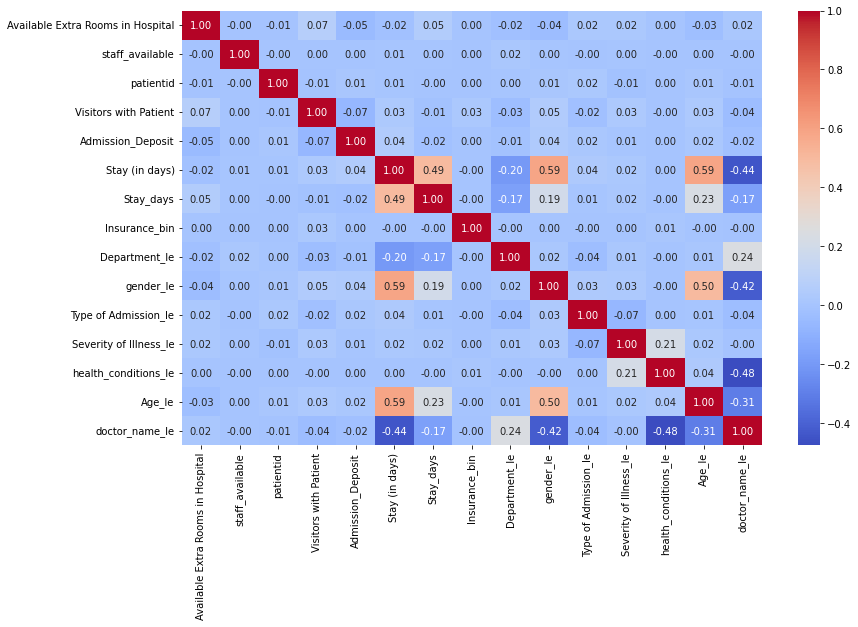

In [25]:
#Graficamos las correlaciones con un mapa de calor
plt.figure(figsize=(13,8))
sns.heatmap(df_train_corr, cbar = True,  square = False, annot=True, fmt= '.2f',cmap= 'coolwarm') 

Se declaran las columnas mas importantes que vamos a utilizar en el modelo.

In [26]:
df_train_colum = df_train[['Department_le', 'Age_le', 'gender_le','doctor_name_le']]
df_train_colum

,Department_le,Age_le,gender_le,doctor_name_le
0,2,4,0,8
1,2,3,0,8
2,2,2,0,8
3,2,3,0,4
4,1,7,1,2
...,...,...,...,...
409995,2,3,0,6
409996,2,2,0,3
409997,2,2,0,6
409998,2,2,0,4


Se declaran las variables que vamos a usar en nuestro modelo.

In [27]:
X = df_train_colum
y = df_train['Stay_days']

In [28]:
df_train.head()

,Available Extra Rooms in Hospital,Department,Ward_Facility_Code,doctor_name,staff_available,patientid,Age,gender,Type of Admission,Severity of Illness,...,Stay (in days),Stay_days,Insurance_bin,Department_le,gender_le,Type of Admission_le,Severity of Illness_le,health_conditions_le,Age_le,doctor_name_le
0,4,gynecology,D,Dr Sophia,0,33070,41-50,Female,Trauma,Extreme,...,8,0.0,1.0,2,0,1,0,1,4,8
1,4,gynecology,B,Dr Sophia,2,34808,31-40,Female,Trauma,Minor,...,9,1.0,0.0,2,0,1,1,2,3,8
2,2,gynecology,B,Dr Sophia,8,44577,21-30,Female,Trauma,Extreme,...,7,0.0,1.0,2,0,1,0,1,2,8
3,4,gynecology,D,Dr Olivia,7,3695,31-40,Female,Urgent,Moderate,...,8,0.0,0.0,2,0,2,2,4,3,4
4,2,anesthesia,E,Dr Mark,10,108956,71-80,Male,Trauma,Moderate,...,34,1.0,0.0,1,1,1,2,1,7,2


**Probamos modelo con metodo de Clasificacion 
ARBOL DE DESICION**

Separamos el train y el test

In [29]:
from sklearn.model_selection import train_test_split

train_x, test_x, train_y, test_y = train_test_split(X, y, test_size = 0.3,random_state = 42) 

Ver cual es la profundidad mas optima para el modelo.

Completado: 5.26%
Completado: 10.53%
Completado: 15.79%
Completado: 21.05%
Completado: 26.32%
Completado: 31.58%
Completado: 36.84%
Completado: 42.11%
Completado: 47.37%
Completado: 52.63%
Completado: 57.89%
Completado: 63.16%
Completado: 68.42%
Completado: 73.68%
Completado: 78.95%
Completado: 84.21%
Completado: 89.47%
Completado: 94.74%
Completado: 100.0%


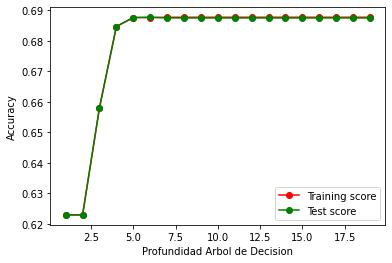

In [32]:
from sklearn.model_selection import cross_validate

tree_train_scores_mean = []
tree_train_scores_std = []
tree_test_scores_mean = []
tree_test_scores_std = []

profundidades = np.arange(1,20,1)
i = 0
i_max = len(profundidades)
for profundidad in profundidades:
    i = i + 1
    Modelo_1 = DecisionTreeClassifier(max_depth=profundidad,random_state = 42)
    tree_scores = cross_validate(Modelo_1, X, y, cv=5, return_train_score=True, n_jobs = -1)
    
    tree_train_scores_mean.append(tree_scores['train_score'].mean())
    tree_train_scores_std.append(tree_scores['train_score'].std())
    
    tree_test_scores_mean.append(tree_scores['test_score'].mean())
    tree_test_scores_std.append(tree_scores['test_score'].std())
    #clear_output(wait=True)
    print('Completado: ' + str(round(i / i_max * 100, 2)) + '%')

plt.plot(profundidades, tree_train_scores_mean, 'o-', color="r",
         label="Training score")
plt.plot(profundidades, tree_test_scores_mean, 'o-', color="g",
         label="Test score")

plt.legend()
plt.ylabel('Accuracy')
plt.xlabel('Profundidad Arbol de Decision')
plt.show()

Entrenamos el modelo con profundidad de 4 ya que es la mejor.

In [35]:
from sklearn.tree import DecisionTreeClassifier

#Instanciamos el modelo
Modelo_1= DecisionTreeClassifier(max_depth=4)

#Entrenamos el modelo
Modelo_1.fit(train_x,train_y)

DecisionTreeClassifier(max_depth=4)

In [36]:
#Veo las columnas mas importantes que el modelo tomo
print(Modelo_1.feature_importances_)

[0.28424518 0.71575482 0.         0.        ]


In [37]:
# Predicción y validacion sobre el test
pred = Modelo_1.predict_proba(test_x)[:, 1]
pred[:20]

array([1.        , 0.54483133, 0.54483133, 0.54483133, 0.54483133,
       1.        , 0.54483133, 0.54483133, 1.        , 0.54483133,
       1.        , 0.54483133, 0.54483133, 0.04418209, 0.04418209,
       0.54483133, 0.54483133, 0.56742727, 1.        , 0.54483133])

In [38]:
#Evaluacion del modelo con Accuracy 
from sklearn.metrics import accuracy_score

print(f'Precisión (accuracy) en el set de testeo: {accuracy_score(Modelo_1.predict(X), y)}')

Precisión (accuracy) en el set de testeo: 0.6846707317073171


Interpretación - Diagrama del árbol

[Text(0.5416666666666666, 0.9, 'node #0\nAge_le <= 4.5\nsamples = 100.0%\nvalue = [0.38, 0.62]'),
 Text(0.4583333333333333, 0.7, 'node #1\nDepartment_le <= 1.5\nsamples = 84.7%\nvalue = [0.44, 0.56]'),
 Text(0.25, 0.5, 'node #2\nDepartment_le <= 0.5\nsamples = 6.6%\nvalue = [0.02, 0.98]'),
 Text(0.16666666666666666, 0.3, 'node #3\nAge_le <= 2.5\nsamples = 2.4%\nvalue = [0.07, 0.93]'),
 Text(0.08333333333333333, 0.1, 'node #4\nsamples = 0.6%\nvalue = [0.0, 1.0]'),
 Text(0.25, 0.1, 'node #5\nsamples = 1.7%\nvalue = [0.09, 0.91]'),
 Text(0.3333333333333333, 0.3, 'node #6\nsamples = 4.2%\nvalue = [0.0, 1.0]'),
 Text(0.6666666666666666, 0.5, 'node #7\nDepartment_le <= 2.5\nsamples = 78.1%\nvalue = [0.48, 0.52]'),
 Text(0.5, 0.3, 'node #8\nAge_le <= 1.5\nsamples = 68.7%\nvalue = [0.45, 0.55]'),
 Text(0.4166666666666667, 0.1, 'node #9\nsamples = 9.0%\nvalue = [0.43, 0.57]'),
 Text(0.5833333333333334, 0.1, 'node #10\nsamples = 59.7%\nvalue = [0.46, 0.54]'),
 Text(0.8333333333333334, 0.3, 'node

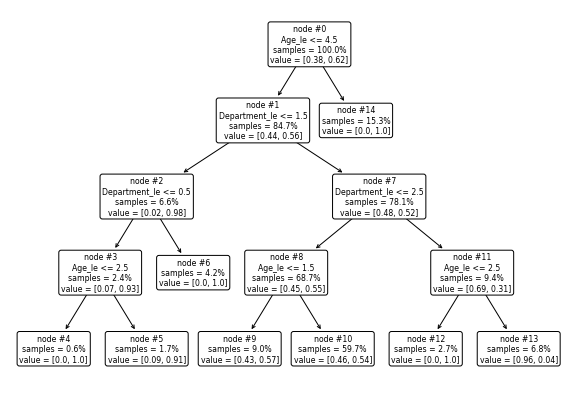

In [39]:
from sklearn.tree import plot_tree

plt.figure(figsize = (10,7))

plot_tree(Modelo_1,
          feature_names= test_x.columns,
          impurity = False,
          node_ids = True,
          proportion = True,
          rounded = True,
          precision = 2)

Creo mi modelo

In [40]:
# Predecimos sobre nuestro set de entrenamieto

y_train_pred = Modelo_1.predict(train_x)

# Predecimos sobre nuestro set de testeo

y_test_pred = Modelo_1.predict(test_x)

## **`Matriz de confusión`**

Veamos la matriz de nuestro modelo

In [41]:
from sklearn.metrics import confusion_matrix

matrix = confusion_matrix(train_y, y_train_pred)
matrix_2 = confusion_matrix(test_y, y_test_pred)


Graficamos la matrix de confusión

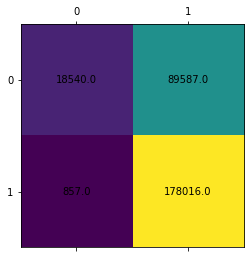

In [42]:
fig, ax = plt.subplots(figsize=(4,5))

ax.matshow(matrix)
for (i, j), z in np.ndenumerate(matrix):
    ax.text(j, i, '{:0.1f}'.format(z), ha='center', va='center')
plt.show()

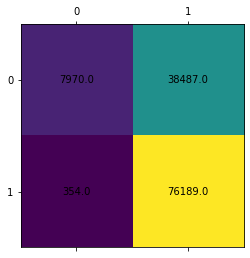

In [43]:
fig, ax = plt.subplots(figsize=(4,5))

ax.matshow(matrix_2)
for (i, j), z in np.ndenumerate(matrix_2):
    ax.text(j, i, '{:0.1f}'.format(z), ha='center', va='center')
plt.show()

### **`Exactitud`**

In [44]:
from sklearn.metrics import accuracy_score

exactitud = accuracy_score(test_y, y_test_pred)
print(f'Precisión (accuracy) del modelo: {exactitud}')

Precisión (accuracy) del modelo: 0.684219512195122


### **`Precisión`**

In [45]:
from sklearn.metrics import precision_score

precision = precision_score(test_y, y_test_pred, average= None)
print(precision)


[0.95747237 0.66438488]


### **`Recall`**

In [46]:
from sklearn.metrics import recall_score

precision = recall_score(test_y, y_test_pred, average= None)
print(precision)

[0.17155649 0.99537515]


Hacemos el pipline de los datos necesarias ya que no debemos analizar los datos en los mismos sistemas donde se crean. El proceso de analítica es costoso computacionalmente, por lo que se separa para evitar perjudicar el rendimiento del servicio. 

In [47]:
# Importamos las librerías necesarias

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn import tree

In [48]:
# Creamos el pipeline

pipe_dt = Pipeline([('scl', StandardScaler()),
			('pca', PCA(n_components=2)),
			('clf', tree.DecisionTreeClassifier(random_state=42))])

In [49]:
# Los guardamos en una lista

pipelines = [pipe_dt]

In [50]:
# Hacemos un diccionario para fines organizativos

pipe_dict = { 0: 'Árbol de decisión'}

In [51]:
# Entrenamos

for pipe in pipelines:
	pipe.fit(train_x, train_y)

In [52]:
# Evaluamos

for idx, val in enumerate(pipelines):
	print('%s pipeline accuracy en test: %.3f' % (pipe_dict[idx], val.score(test_x, test_y)))

Árbol de decisión pipeline accuracy en test: 0.687


In [54]:
# Identificamos el mejor modelo para el set de testeo

best_acc = 0.0
best_clf = 0
best_pipe = ''
for idx, val in enumerate(pipelines):
	if val.score(test_x, test_y) > best_acc:
		best_acc = val.score(test_x, test_y)
		best_pipe = val
		best_clf = idx
print('Modelo con el mejor accuracy: %s' % pipe_dict[best_clf])

Modelo con el mejor accuracy: Árbol de decisión


In [55]:
# Guardamos el pipeline en un archivo

import joblib #pickle es alternativa

joblib.dump(best_pipe, 'Mejor_pipeline.pkl', compress=1)
print('Pipeline de %s guardado a archivo' % pipe_dict[best_clf])

Pipeline de Árbol de decisión guardado a archivo


In [56]:
best_model = joblib.load('Mejor_pipeline.pkl')

X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, test_size=0.30, random_state=42, stratify=y)

In [57]:
best_model.fit(X_train,y_train)

Pipeline(steps=[('scl', StandardScaler()), ('pca', PCA(n_components=2)),
                ('clf', DecisionTreeClassifier(random_state=42))])

In [58]:
best_model.score(X_test, y_test)

0.6875365853658536

**Incorporamos el scoring al dataframe principal**

In [59]:
df_test = pd.read_csv('hospitalizaciones_test.csv') #Importe de datos

#Normalización de columnas tipo string, todo en minúsculas
for column in df_test.columns:
    if df_test[column].dtype == ('object'):
        df_test[column]=df_test[column].str.lower()

#Cambio de variables string a números
encoder = preprocessing.LabelEncoder()
for column in df_test.columns:
    if df_test[column].dtype != ('int64' or 'float'):
        df_test[column]=encoder.fit_transform(df_test[column])
df_test

,Available Extra Rooms in Hospital,Department,Ward_Facility_Code,doctor_name,staff_available,patientid,Age,gender,Type of Admission,Severity of Illness,health_conditions,Visitors with Patient,Insurance,Admission_Deposit
0,3,1,5,4,10,2858,2,0,1,2,5,2,0,52469
1,2,4,4,1,4,65657,5,0,1,2,0,2,1,24227
2,2,2,4,1,7,45598,5,2,1,2,4,3,0,75017
3,2,1,5,4,1,31132,2,0,1,2,4,2,1,19861
4,2,0,0,1,7,125021,5,0,1,0,1,2,0,53798
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89995,4,1,5,6,2,43001,1,0,1,1,3,3,0,23729
89996,13,1,5,4,8,85601,3,0,0,2,5,2,0,45398
89997,2,1,1,6,3,22447,1,0,0,2,3,2,0,74998
89998,2,2,0,1,1,29957,6,0,1,0,1,2,0,49049


In [60]:
important_features = df_test[['doctor_name','Department','Age', 'gender']]
y = Modelo_1.predict(important_features)

C:\Users\Natalia\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- Age
- Department
- doctor_name
- gender
Feature names seen at fit time, yet now missing:
- Age_le
- Department_le
- doctor_name_le
- gender_le

  warnings.warn(message, FutureWarning)


In [61]:
prediction = pd.DataFrame(y.reshape(-1,1), columns=['pred'])
prediction.to_csv('ntrulla.csv', index=False)

In [63]:
df_test['Age'] = df_test['Age'].astype('object')